In [1]:
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv("2018_all_indicators.csv")

In [3]:
df = df[['dimension','indicator_name','iso3','country_name','2017']]

In [5]:
df.head(4)

,dimension,indicator_name,iso3,country_name,2017
0,Composite indices,HDI rank,AFG,Afghanistan,168.0
1,Composite indices,HDI rank,ALB,Albania,68.0
2,Composite indices,HDI rank,DZA,Algeria,85.0
3,Composite indices,HDI rank,AND,Andorra,35.0


In [4]:
df.shape

(25636, 5)

In [6]:
df = df.dropna()

In [7]:
df.shape

(12728, 5)

In [8]:
df.iso3.unique().shape

(195,)

In [9]:
country_codes = list(df.iso3.unique())

In [10]:
country_codes[:10]

['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT']

In [11]:
df['indicator_name'].unique()

array(['HDI rank', 'Human Development Index (HDI)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Sex ratio at birth (male to female births)',
       'Total population (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)',
       'Education index', 'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
       'Government expenditure on education (% of GDP)',
       'Gross enrolment ratio, pre-primary (% of preschool-age children)',
       'Gross enrolment ratio, primary (% of primary school-age population)',
       'Gross enrolment ratio, secondary (% of secondary school-age population)',
       'Gross enrolment ratio, tertiary (% of tertiary school-age population)',
   

In [12]:
df['dimension'].unique()

array(['Composite indices', 'Demography', 'Education',
       'Environmental sustainability', 'Gender', 'Health',
       'Human Security', 'Income/composition of resources', 'Inequality',
       'Mobility and communication', 'Poverty',
       'Socio-economic sustainability', 'Trade and financial flows',
       'Work, employment and vulnerability'], dtype=object)

In [13]:
def indicators_in_dimension(dimension):
    return list(df[df['dimension']==dimension]['indicator_name'].unique())

In [14]:
indicators_in_dimension("Health")

['Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index']

In [15]:
def data_for_indicator(indicator):
    indicator_data = df[df['indicator_name']==indicator]
    zipped_values = zip(list(indicator_data['iso3']),list(indicator_data['2017']))
    return {k:{indicator : v} for k,v in zipped_values}

In [16]:
#This will be our label
life_expec = 'Life expectancy at birth (years)'
indic = data_for_indicator(life_expec)

In [17]:
for k, v in indic.items():
    print(k,v)

CAN {'Life expectancy at birth (years)': 82.5}
ECU {'Life expectancy at birth (years)': 76.6}
TJK {'Life expectancy at birth (years)': 71.2}
CZE {'Life expectancy at birth (years)': 78.9}
SVK {'Life expectancy at birth (years)': 77.0}
SUR {'Life expectancy at birth (years)': 71.5}
UGA {'Life expectancy at birth (years)': 60.2}
PRK {'Life expectancy at birth (years)': 71.9}
GBR {'Life expectancy at birth (years)': 81.7}
SYR {'Life expectancy at birth (years)': 71.0}
HRV {'Life expectancy at birth (years)': 77.8}
BTN {'Life expectancy at birth (years)': 70.6}
EST {'Life expectancy at birth (years)': 77.7}
MAR {'Life expectancy at birth (years)': 76.1}
MMR {'Life expectancy at birth (years)': 66.7}
PAN {'Life expectancy at birth (years)': 78.2}
LVA {'Life expectancy at birth (years)': 74.7}
ITA {'Life expectancy at birth (years)': 83.2}
UZB {'Life expectancy at birth (years)': 71.4}
IRN {'Life expectancy at birth (years)': 76.2}
MDA {'Life expectancy at birth (years)': 71.7}
SGP {'Life ex

In [18]:
def add_indicator_to(dictionary, indicator):
    indicator_data = df[df['indicator_name']==indicator]
    zipped_values = zip(list(indicator_data['iso3']), list(indicator_data['2017']))
    for k, v in zipped_values:
        try:
            dictionary[k][indicator] = v
        except:
            print("failed with key: "+k+" on "+indicator)

In [19]:
vaccination = 'Infants lacking immunization, measles (% of one-year-olds)'
add_indicator_to(indic, vaccination)

failed with key: MCO on Infants lacking immunization, measles (% of one-year-olds)
failed with key: NRU on Infants lacking immunization, measles (% of one-year-olds)
failed with key: SMR on Infants lacking immunization, measles (% of one-year-olds)
failed with key: TUV on Infants lacking immunization, measles (% of one-year-olds)


In [20]:
indicators = [
    'Share of seats in parliament (% held by women)',
    'Infants lacking immunization, measles (% of one-year-olds)',
    'Youth unemployment rate (female to male ratio)',
    'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
    'Unemployment, total (% of labour force)',
       'Unemployment, youth (% ages 15–24)',
       'Vulnerable employment (% of total employment)',
]
for indicator in indicators:
    add_indicator_to(indic, indicator)


failed with key: MCO on Share of seats in parliament (% held by women)
failed with key: NRU on Share of seats in parliament (% held by women)
failed with key: SMR on Share of seats in parliament (% held by women)
failed with key: TUV on Share of seats in parliament (% held by women)
failed with key: MCO on Infants lacking immunization, measles (% of one-year-olds)
failed with key: NRU on Infants lacking immunization, measles (% of one-year-olds)
failed with key: SMR on Infants lacking immunization, measles (% of one-year-olds)
failed with key: TUV on Infants lacking immunization, measles (% of one-year-olds)
failed with key: NRU on Expected years of schooling (years)
failed with key: SMR on Expected years of schooling (years)
failed with key: NRU on Expected years of schooling, female (years)
failed with key: SMR on Expected years of schooling, female (years)
failed with key: NRU on Expected years of schooling, male (years)
failed with key: SMR on Expected years of schooling, male (yea

In [21]:
final_df = pd.DataFrame(indic).transpose()

In [22]:
final_df.count()

Expected years of schooling (years)                           190
Expected years of schooling, female (years)                   179
Expected years of schooling, male (years)                     179
Infants lacking immunization, measles (% of one-year-olds)    189
Life expectancy at birth (years)                              191
Share of seats in parliament (% held by women)                189
Unemployment, total (% of labour force)                       180
Unemployment, youth (% ages 15–24)                            180
Vulnerable employment (% of total employment)                 180
Youth unemployment rate (female to male ratio)                180
dtype: int64

In [23]:
final_df =final_df.dropna()

In [24]:
final_df.count()

Expected years of schooling (years)                           170
Expected years of schooling, female (years)                   170
Expected years of schooling, male (years)                     170
Infants lacking immunization, measles (% of one-year-olds)    170
Life expectancy at birth (years)                              170
Share of seats in parliament (% held by women)                170
Unemployment, total (% of labour force)                       170
Unemployment, youth (% ages 15–24)                            170
Vulnerable employment (% of total employment)                 170
Youth unemployment rate (female to male ratio)                170
dtype: int64

In [25]:
final_df.head(5)

,Expected years of schooling (years),"Expected years of schooling, female (years)","Expected years of schooling, male (years)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),Share of seats in parliament (% held by women),"Unemployment, total (% of labour force)","Unemployment, youth (% ages 15–24)",Vulnerable employment (% of total employment),Youth unemployment rate (female to male ratio)
AFG,10.4,8.0,12.7,38.0,64.0,27.4,8.8,17.7,66.1,1.05
AGO,11.8,11.0,12.7,58.0,61.8,30.5,8.2,19.1,66.7,1.02
ALB,14.8,15.0,14.4,4.0,78.5,27.9,13.9,30.0,57.2,0.96
ARE,13.6,14.3,13.4,1.0,77.4,22.5,1.7,5.1,0.4,1.21
ARG,17.4,18.7,16.2,11.0,76.7,38.9,8.7,24.7,21.4,1.17


# Feature Correlation Analysis

//anaconda/envs/kaggle/lib/python3.5/site-packages/matplotlib/tight_layout.py:182: UserWarning: The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The bottom and top margins cannot be made large '


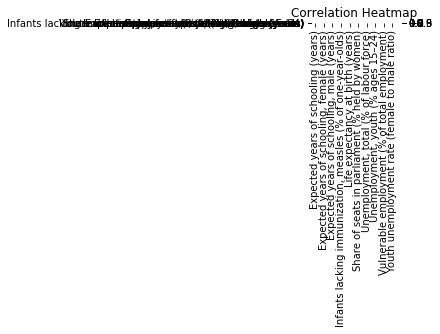

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = sns.heatmap(final_df.corr())
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap", figsize=(96,72))

In [27]:
final_df.index

Index(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       ...
       'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=170)

In [28]:
final_df[life_expec].describe()

count    170.000000
mean      72.163529
std        7.697211
min       52.200000
25%       66.800000
50%       73.800000
75%       77.400000
max       83.900000
Name: Life expectancy at birth (years), dtype: float64

# Begin Training
## Separating Training Data from Testing Data

In [29]:
#making sure the label is not one of the training features.
train_features = [feature for feature in list(final_df) if feature != life_expec]

#training data
train_df = final_df.iloc[:150][train_features]
train_label = final_df.iloc[:150][life_expec]

#test data
test_df = final_df.iloc[150:][train_features]
test_label = final_df.iloc[150:][life_expec]

In [34]:
test_label[:10]

TLS    69.2
TON    73.2
TTO    70.8
TUN    75.9
TUR    76.0
TZA    66.3
UGA    60.2
UKR    72.1
URY    77.6
USA    79.5
Name: Life expectancy at birth (years), dtype: float64

In [30]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_df, label=train_label)
dtest = xgb.DMatrix(test_df, label=test_label)
# specify parameters via map
param = {'max_depth':6,
         'eta':1,  #this is the default value anyway
         'colsample_bytree':1  #this is the default value anyway
        }

num_round = 15
initial_trees = xgb.train(param, dtrain, num_round)
# make prediction
first_preds = initial_trees.predict(dtest)

In [31]:
first_preds

array([ 71.95854187,  76.39560699,  77.32462311,  78.06069946,
        82.74091339,  66.45611572,  66.76526642,  74.18044281,
        72.31369019,  78.64035034,  73.18171692,  76.04037476,
        75.81767273,  70.09674072,  64.80238342,  72.91110992,
        61.02710724,  79.82162476,  66.28809357,  66.62446594], dtype=float32)

In [32]:
import math 

def msesqrt(test_label, preds):
    squared_errors = [diff*diff for diff in (test_label - preds)]
    mse = sum(squared_errors)/len(preds)
    return math.sqrt(mse)

msesqrt(test_label, first_preds)

5.604759216972512

In [33]:
test_label - first_preds

TLS    -2.758542
TON    -3.195607
TTO    -6.524623
TUN    -2.160699
TUR    -6.740913
TZA    -0.156116
UGA    -6.565266
UKR    -2.080443
URY     5.286310
USA     0.859650
UZB    -1.781717
VCT    -2.740375
VEN    -1.117673
VNM     6.403259
VUT     7.497617
WSM     2.288890
YEM     4.172893
ZAF   -16.421625
ZMB    -3.988094
ZWE    -4.924466
Name: Life expectancy at birth (years), dtype: float64

In [35]:
param = {'max_depth':5,
         'eta':.1, 
         'colsample_bytree':.75 
        }
num_round = 40
new_tree = xgb.train(param, dtrain, num_round)
# make prediction
new_preds = new_tree.predict(dtest)

In [36]:
msesqrt(test_label, new_preds)

3.748717075656575

In [37]:
test_label - new_preds

TLS    -1.404637
TON    -0.521214
TTO    -4.529964
TUN     0.065718
TUR    -0.887581
TZA     4.089173
UGA    -2.845662
UKR    -3.533080
URY     3.896791
USA     2.249405
UZB     0.331709
VCT    -0.657481
VEN    -0.612233
VNM     4.110100
VUT    10.464921
WSM     3.858295
YEM     2.177531
ZAF    -3.251642
ZMB    -6.084171
ZWE    -2.326077
Name: Life expectancy at birth (years), dtype: float64

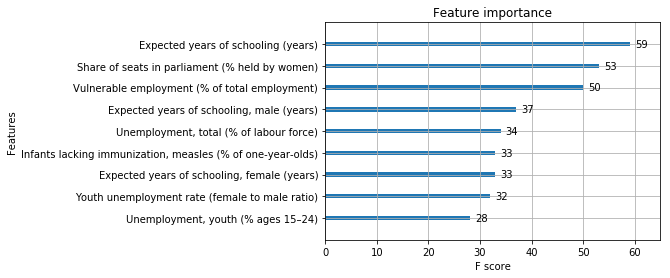

In [38]:
fig = xgb.plot_importance(new_tree)

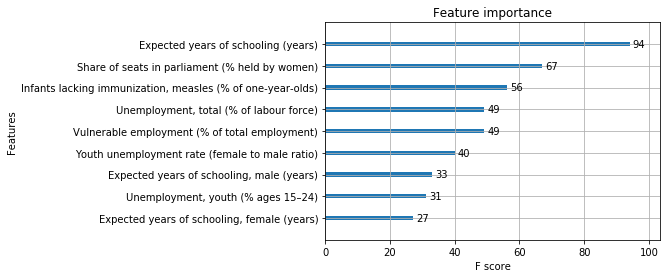

In [39]:
xgb.plot_importance(initial_trees)

In [389]:
agg_preds = (new_preds + first_preds)/2

In [390]:
agg_preds

array([69.36041 , 62.967743, 73.70699 , 76.12506 , 76.95814 , 78.65455 ,
       70.476456, 64.74556 , 74.90964 , 76.20831 , 81.33636 , 77.31447 ,
       72.72916 , 71.70128 , 65.58957 , 75.215965, 75.00469 , 63.18793 ,
       69.98039 , 64.9274  ], dtype=float32)

In [391]:
msesqrt(std, test_label, agg_preds)

3.3816703332355047